# Probabilities, Likelihoods, and Bayes Theorem

Created: 08/25/2023 by Tom Lever

Updated: 08/25/2023 by Tom Lever

**SUMMARY**: In this notebook we will be reviewing some probability distributions, showing histograms and scatterplots to visualize the distributions in Python in Section 1. In Section 2 we define likelihoods, and show how to compute them in Python. In Section 3 we explain Bayes Theorem, and show how to use Bayes Theorem to compute the posterior probability for parameters based on observed data, using the likelihoods from Section 2.

## Section 1

In this section we generate samples from a variety of distributions and use seaborn and matplotlib to plot the resulting data.

First 5 values from uniform distribution:
[12.85345655 14.24765204 13.32480176  8.1946805   7.14608227]


C:\Users\Tom\AppData\Local\Temp\ipykernel_19128\4063804319.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


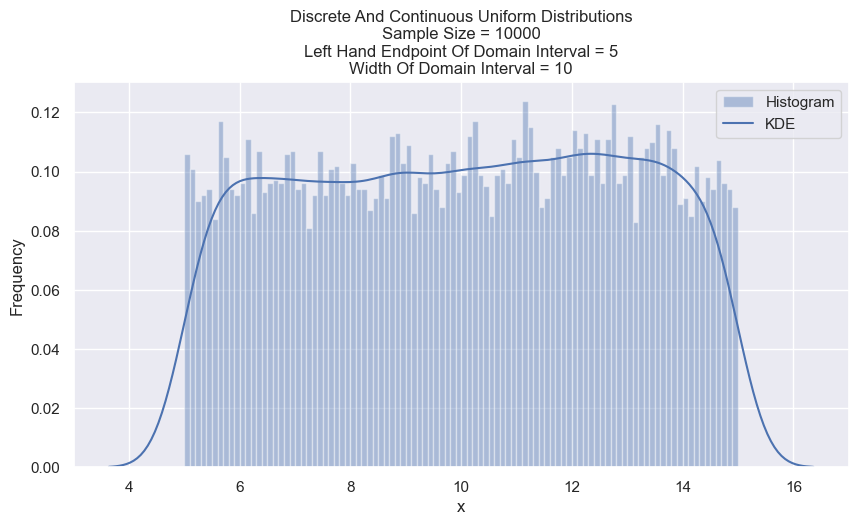

In [1]:
from scipy.stats import uniform
sample_size = 10000
left_hand_endpoint_of_domain_interval = 5
width_of_domain_interval = 10
array_of_uniformly_distributed_random_numbers = uniform.rvs(size = sample_size, loc = left_hand_endpoint_of_domain_interval, scale = width_of_domain_interval)
print("First 5 values from uniform distribution:")
print(array_of_uniformly_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_uniformly_distributed_random_numbers,
    bins = 100,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Discrete And Continuous Uniform Distributions"
        + f"\nSample Size = {sample_size}"
        + f"\nLeft Hand Endpoint Of Domain Interval = {left_hand_endpoint_of_domain_interval}"
        + f"\nWidth Of Domain Interval = {width_of_domain_interval}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Discrete_And_Continuous_Uniform_Distributions.png")
plt.show()

First 5 values from normal distribution:
[ 2.53168655  1.85043947  3.00991099  1.32779905 -0.98586789]


C:\Users\Tom\AppData\Local\Temp\ipykernel_19128\3279614972.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


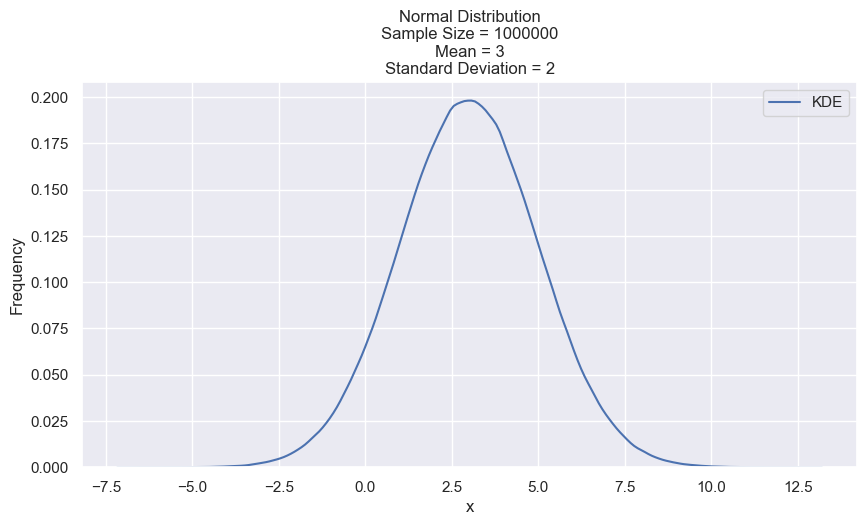

In [2]:
from scipy.stats import norm
sample_size = 1000000
mean = 3
standard_deviation = 2
array_of_normally_distributed_random_numbers = norm.rvs(
    size = sample_size,
    loc = mean,
    scale = standard_deviation
)
print("First 5 values from normal distribution:")
print(array_of_normally_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_normally_distributed_random_numbers,
    bins = 100,
    kde_kws = {"label": "KDE"},
    hist = False
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Normal Distribution"
        + f"\nSample Size = {sample_size}"
        + f"\nMean = {mean}"
        + f"\nStandard Deviation = {standard_deviation}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Normal_Distribution.png")
plt.show()

In [3]:
array_of_normally_distributed_numbers = norm.rvs(size = 100, loc = 3, scale = 2)
print(array_of_normally_distributed_numbers)

[ 2.87921630e+00  3.51802477e+00  6.15775162e+00  1.64041146e+00
  4.06688038e+00  5.94025259e+00  6.03025679e+00  3.80576669e+00
  2.85609767e+00  4.03610799e+00  2.04944985e+00  8.12934016e-01
  2.33963962e+00  2.12969288e+00  4.50099194e+00  1.57486222e+00
 -2.73338516e+00  4.10160169e+00  1.81427739e+00  2.55720536e+00
  2.87670887e-01  3.16127970e+00  4.22423974e+00  4.48915023e+00
  3.25595372e+00  1.46449762e+00  7.05845212e+00  8.55365290e-01
  2.39825137e+00 -1.76839955e-04  2.42829930e+00  3.07892840e+00
  7.38895649e+00  5.39070413e-01  1.97581287e+00  3.91394770e+00
  3.92273855e+00 -5.88044496e-01  3.88599755e+00  4.04700195e+00
  3.66896890e+00  3.08161783e+00  5.02165028e+00  3.76806454e+00
  1.69570895e+00  4.36572229e+00  4.51607493e+00  1.62889868e+00
  4.18788600e+00  4.79379830e+00  5.22781874e+00  4.47378805e+00
  4.24461980e+00  3.70403368e+00 -1.47542244e-01  6.36326949e+00
  4.40229136e+00  1.89202551e+00  4.53747012e+00  1.54879598e+00
  2.63418176e+00  3.00208

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


First 5 values from Bernoulli distribution:
[0 0 0 1 1]


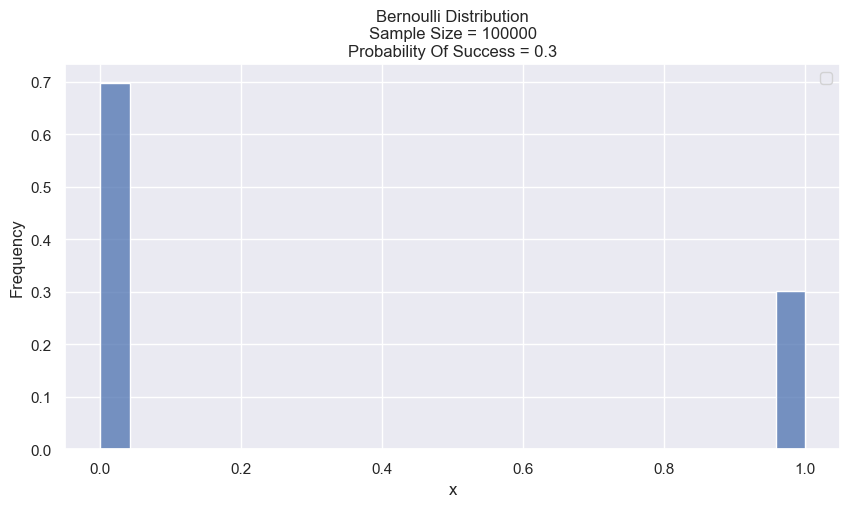

In [4]:
from scipy.stats import bernoulli
sample_size = 100000
probability_of_success = 0.3
array_of_Bernoulli_distributed_random_numbers = bernoulli.rvs(
    size = sample_size,
    p = probability_of_success
)
print('First 5 values from Bernoulli distribution:')
print(array_of_Bernoulli_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.histplot(
    data = array_of_Bernoulli_distributed_random_numbers,                  
    stat = "probability"
)
the_Axes.set(
    xlabel='x',
    ylabel='Frequency',
    title = (
        "Bernoulli Distribution"
        + f"\nSample Size = {sample_size}"
        + f"\nProbability Of Success = {probability_of_success}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Bernoulli_Distribution.png")
plt.show()